<a href="https://colab.research.google.com/github/PrathameshMool/python-learning-projects/blob/main/Deep_CNN_image_clasifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Setup and load dependencies

##1.1 install dependencies and setup

In [169]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip list

In [170]:
import tensorflow as tf
import os

In [171]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [172]:
# avoiding OMM (out of memory) error by setting gpu memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

##1.2 Remove dodgy images

In [207]:
import cv2
import imghdr

In [208]:
data_dir ='/content/drive/MyDrive/data for cnn'

data_dir

'/content/drive/MyDrive/data for cnn'

In [209]:
# os.listdir(os.path.join(data_dir,'happy'))
#os.remove('.ipynb_checkpoints')
os.listdir(os.path.join(data_dir))

['happy', '.ipynb_checkpoints', 'sad']

In [210]:
image_exts = ['jpeg','jpg','bmp','png']

In [177]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    print(image)

7-Habits-of-Happy-People-image.jpeg
AOh-ky2WP3SuRZ65XQUFtX0ZSODrQl9R936N1KTHXfh1KAs64-c-mo.jpg
_happy_jumping_on_beach-40815.jpg
1920px-face-smile.svg_.png.jpg
compassion-900x387.jpg
960x0.jpg
988689_Wallpaper2.jpg
happy-people21.jpg
613k1XcpYCL._SL1200_.jpg
fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg
happy-people.jpg
image.jpeg
happy-person-arms-raised-outstretched-69762123.jpg
image2.jpeg
image6.jpeg
image3.jpeg
image4.jpeg
image7.jpeg
image9.jpeg
image5.jpeg
image12.jpeg
image10.jpeg
image13.jpeg
image8.jpeg
image16.jpeg
happy-people-funny-isolated-over-white-background-35582466.jpg
image14.jpeg
image15.jpeg
image11.jpeg
image18.jpeg
image19.jpeg
goup-happy-people-group-jumping-isolated-white-background-35582232.jpg
image17.jpeg
image20.jpeg
1902540.jpg
image23.jpeg
image21.jpeg
happy-people-13772392.jpg
image24.jpeg
image28.jpeg
getty_152414899_97046097045006_68075.jpg
happy-person.jpeg
goup-happy-people-group-jumping-isolated-white-background-3

In [211]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list{}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with the image{}'.format(image_path))

  

Issue with the image/content/drive/MyDrive/data for cnn/happy/.ipynb_checkpoints
Image not in ext list/content/drive/MyDrive/data for cnn/happy/192px.svg
Image not in ext list/content/drive/MyDrive/data for cnn/happy/cartoon-emoji-emoticon-smiling-smiley-260nw-529469974.jpg
Image not in ext list/content/drive/MyDrive/data for cnn/happy/depositphotos_13303355-stock-photo-3d-smiley-ball.jpg
Image not in ext list/content/drive/MyDrive/data for cnn/happy/depositphotos_13975132-stock-photo-smiley.jpg
Image not in ext list/content/drive/MyDrive/data for cnn/happy/happy-smiley-emoticon-face-260nw-123417493.jpg
Image not in ext list/content/drive/MyDrive/data for cnn/happy/human-face-expressions-emotions-young-260nw-442881877.jpg
Image not in ext list/content/drive/MyDrive/data for cnn/happy/happy-home.jpg
Image not in ext list/content/drive/MyDrive/data for cnn/happy/krisdog210500005.jpg
Image not in ext list/content/drive/MyDrive/data for cnn/happy/smiley-vector-happy-face-260nw-408014413.jp

###1.3 Load Data

In [212]:
# to check the documentation of the function

tf.data.Dataset??


In [213]:
import numpy as np
from matplotlib import pyplot as plt

In [214]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data for cnn')



Found 274 files belonging to 3 classes.


In [215]:

data_iterator = data.as_numpy_iterator()

In [216]:
# get another batch from the iterator
batch = data_iterator.next()
len(batch)

2

In [217]:
# image repreented as a numpy array
batch[0].shape

(32, 256, 256, 3)

In [218]:
# class 2 = Sad people
# class 1 = happy people

batch[1]

array([2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 2], dtype=int32)

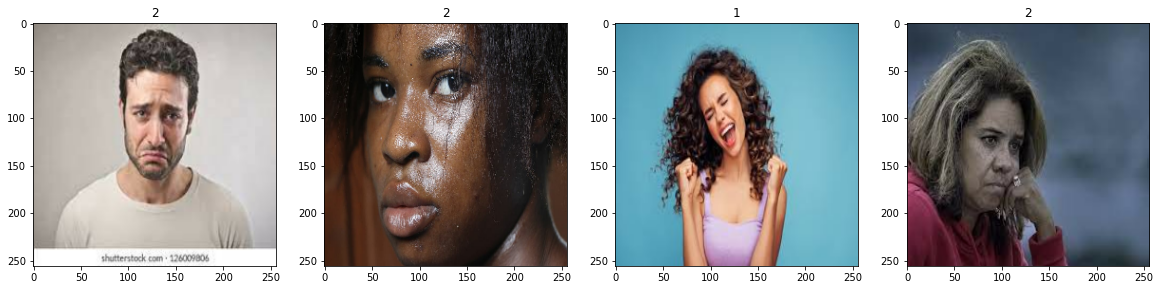

In [219]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [220]:
scaled = batch[0]/255

In [222]:
scaled.min()


0.0

#2 Pre processing the data

###2.1 Scaling the data

In [223]:
data = data.map(lambda x,y: (x/255,y))

In [224]:
scaled_iterator = data.as_numpy_iterator()


In [225]:
batch = scaled_iterator.next()

In [226]:
batch[0].min()

0.0

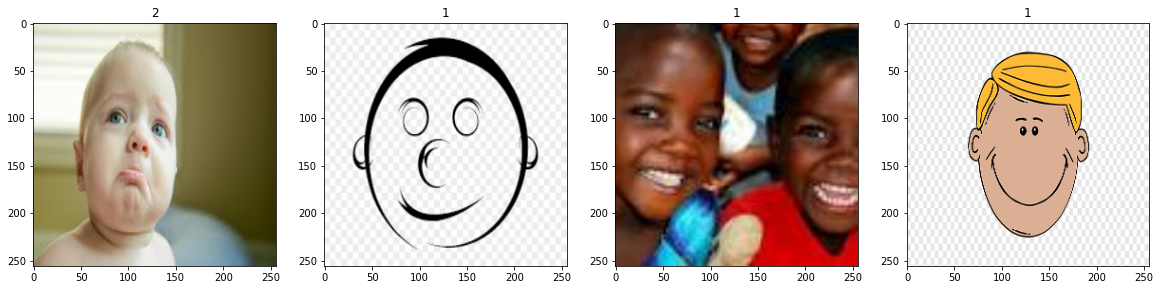

In [227]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

###2.2 Spltting the data


In [228]:
len(data)

9

In [232]:
# lets split the data into training, variable and test

train_size = int(len(data)*.7)  # for training
val_size = int(len(data)*.2)+1  # for training
test_size = int(len(data)*.1)+1 # post testing

In [233]:
test_size + val_size + train_size

9

In [234]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

#3 Deep Model


##3.1 building deep learning Model

In [235]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [236]:
model = Sequential()


In [237]:

model.add(Conv2D(16, (3,3), 1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())


model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())


model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [238]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [239]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)     

##3.2 Train 

In [240]:
logdir = '/content/logs'

In [241]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [242]:
hist = model.fit(train, epochs = 30, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/30
6/6 [==============================] - 4s 389ms/step - loss: -12.7305 - accuracy: 0.5208 - val_loss: -49.9197 - val_accuracy: 0.5625
Epoch 2/30
6/6 [==============================] - 3s 368ms/step - loss: -133.7917 - accuracy: 0.6146 - val_loss: -302.7220 - val_accuracy: 0.6719
Epoch 3/30
6/6 [==============================] - 3s 372ms/step - loss: -643.4500 - accuracy: 0.6406 - val_loss: -1205.3384 - val_accuracy: 0.6875
Epoch 4/30
6/6 [==============================] - 4s 567ms/step - loss: -2570.0969 - accuracy: 0.6458 - val_loss: -5925.8164 - val_accuracy: 0.5938
Epoch 5/30
6/6 [==============================] - 4s 564ms/step - loss: -10355.0195 - accuracy: 0.6198 - val_loss: -18326.9609 - val_accuracy: 0.6094
Epoch 6/30
6/6 [==============================] - 4s 562ms/step - loss: -30330.0449 - accuracy: 0.6146 - val_loss: -63794.5234 - val_accuracy: 0.5000
Epoch 7/30
6/6 [==============================] - 3s 379ms/step - loss: -79097.4766 - accuracy: 0.6198 - val_loss: 

In [243]:
hist.history

{'loss': [-12.730499267578125,
  -133.79168701171875,
  -643.4500122070312,
  -2570.096923828125,
  -10355.01953125,
  -30330.044921875,
  -79097.4765625,
  -163447.625,
  -449227.5,
  -854570.0,
  -1768916.0,
  -3232572.75,
  -5792484.0,
  -9561979.0,
  -14628251.0,
  -22308662.0,
  -34582108.0,
  -54418620.0,
  -71453752.0,
  -112727296.0,
  -153396768.0,
  -196299984.0,
  -278354592.0,
  -372500512.0,
  -561693952.0,
  -642860800.0,
  -800850432.0,
  -1034110016.0,
  -1314375040.0,
  -1888631936.0],
 'accuracy': [0.5208333134651184,
  0.6145833134651184,
  0.640625,
  0.6458333134651184,
  0.6197916865348816,
  0.6145833134651184,
  0.6197916865348816,
  0.6770833134651184,
  0.6041666865348816,
  0.6302083134651184,
  0.6197916865348816,
  0.6197916865348816,
  0.5989583134651184,
  0.625,
  0.6197916865348816,
  0.640625,
  0.6302083134651184,
  0.6197916865348816,
  0.6458333134651184,
  0.6302083134651184,
  0.6354166865348816,
  0.6458333134651184,
  0.6458333134651184,
  0.630

##3.3 Plotting performance

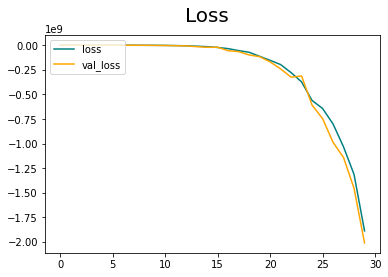

In [244]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal', label ='loss')
plt.plot(hist.history['val_loss'],color= 'orange', label ='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

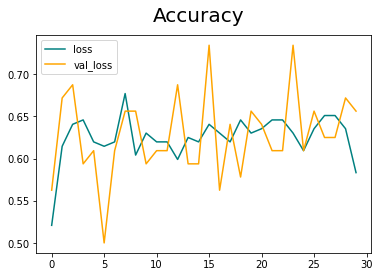

In [245]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal', label ='loss')
plt.plot(hist.history['val_accuracy'],color= 'orange', label ='val_loss')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#4. Evaluate performance

###4.1 Evaluate

In [246]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [247]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [248]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 230ms/step


In [249]:
print(f'Precison:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precison:1.0, Recall:1.0, Accuracy:0.5555555820465088


##4.2 Test

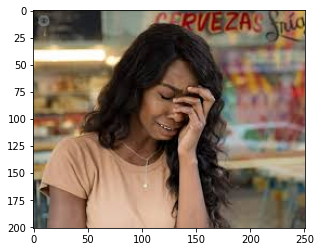

In [250]:
img =cv2.imread('/content/test random/sad test.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

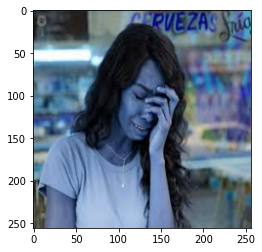

In [251]:
resize  = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [252]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [253]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 16ms/step


In [254]:
yhat

array([[1.]], dtype=float32)

In [163]:
if yhat > 1.5:
  print(f'Predicted person is SAD')
else: 
  print(f'Predicted person is Happy')

Predicted person is Happy
